###DRUG PREDICTION IN RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('drug200.csv')  # Replace 'drug200.csv' with your actual CSV file path

# Split into X (features) and y (target variable)
X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']]
y = df['Drug']


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,2,3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=10, random_state=0)
regressor.fit(X, y)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:

def get_user_input_and_predict():
    age = float(input("Enter age: "))
    sex = input("Enter sex (F/M): ").strip().upper()
    bp = input("Enter BP (LOW/NORMAL/HIGH): ").strip().upper()
    cholesterol = input("Enter cholesterol (NORMAL/HIGH): ").strip().upper()
    na_to_k = float(input("Enter Na_to_K ratio: "))

    # Create input array matching the transformed format
    input_data = np.array([[age, sex, bp, cholesterol, na_to_k]])
    input_transformed = np.array(ct.transform(input_data))

    # Predict using the trained regressor
    predicted_value = regressor.predict(input_transformed).astype(int)

    # Inverse transform to decode back to original labels
    predicted_label = le.inverse_transform(predicted_value)

    print("Predicted drug:", predicted_label[0])

# Call the function to get user input and predict
get_user_input_and_predict()


Enter age: 20
Enter sex (F/M): m
Enter BP (LOW/NORMAL/HIGH): normal
Enter cholesterol (NORMAL/HIGH): normal
Enter Na_to_K ratio: 3.6
Predicted drug: drugX


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


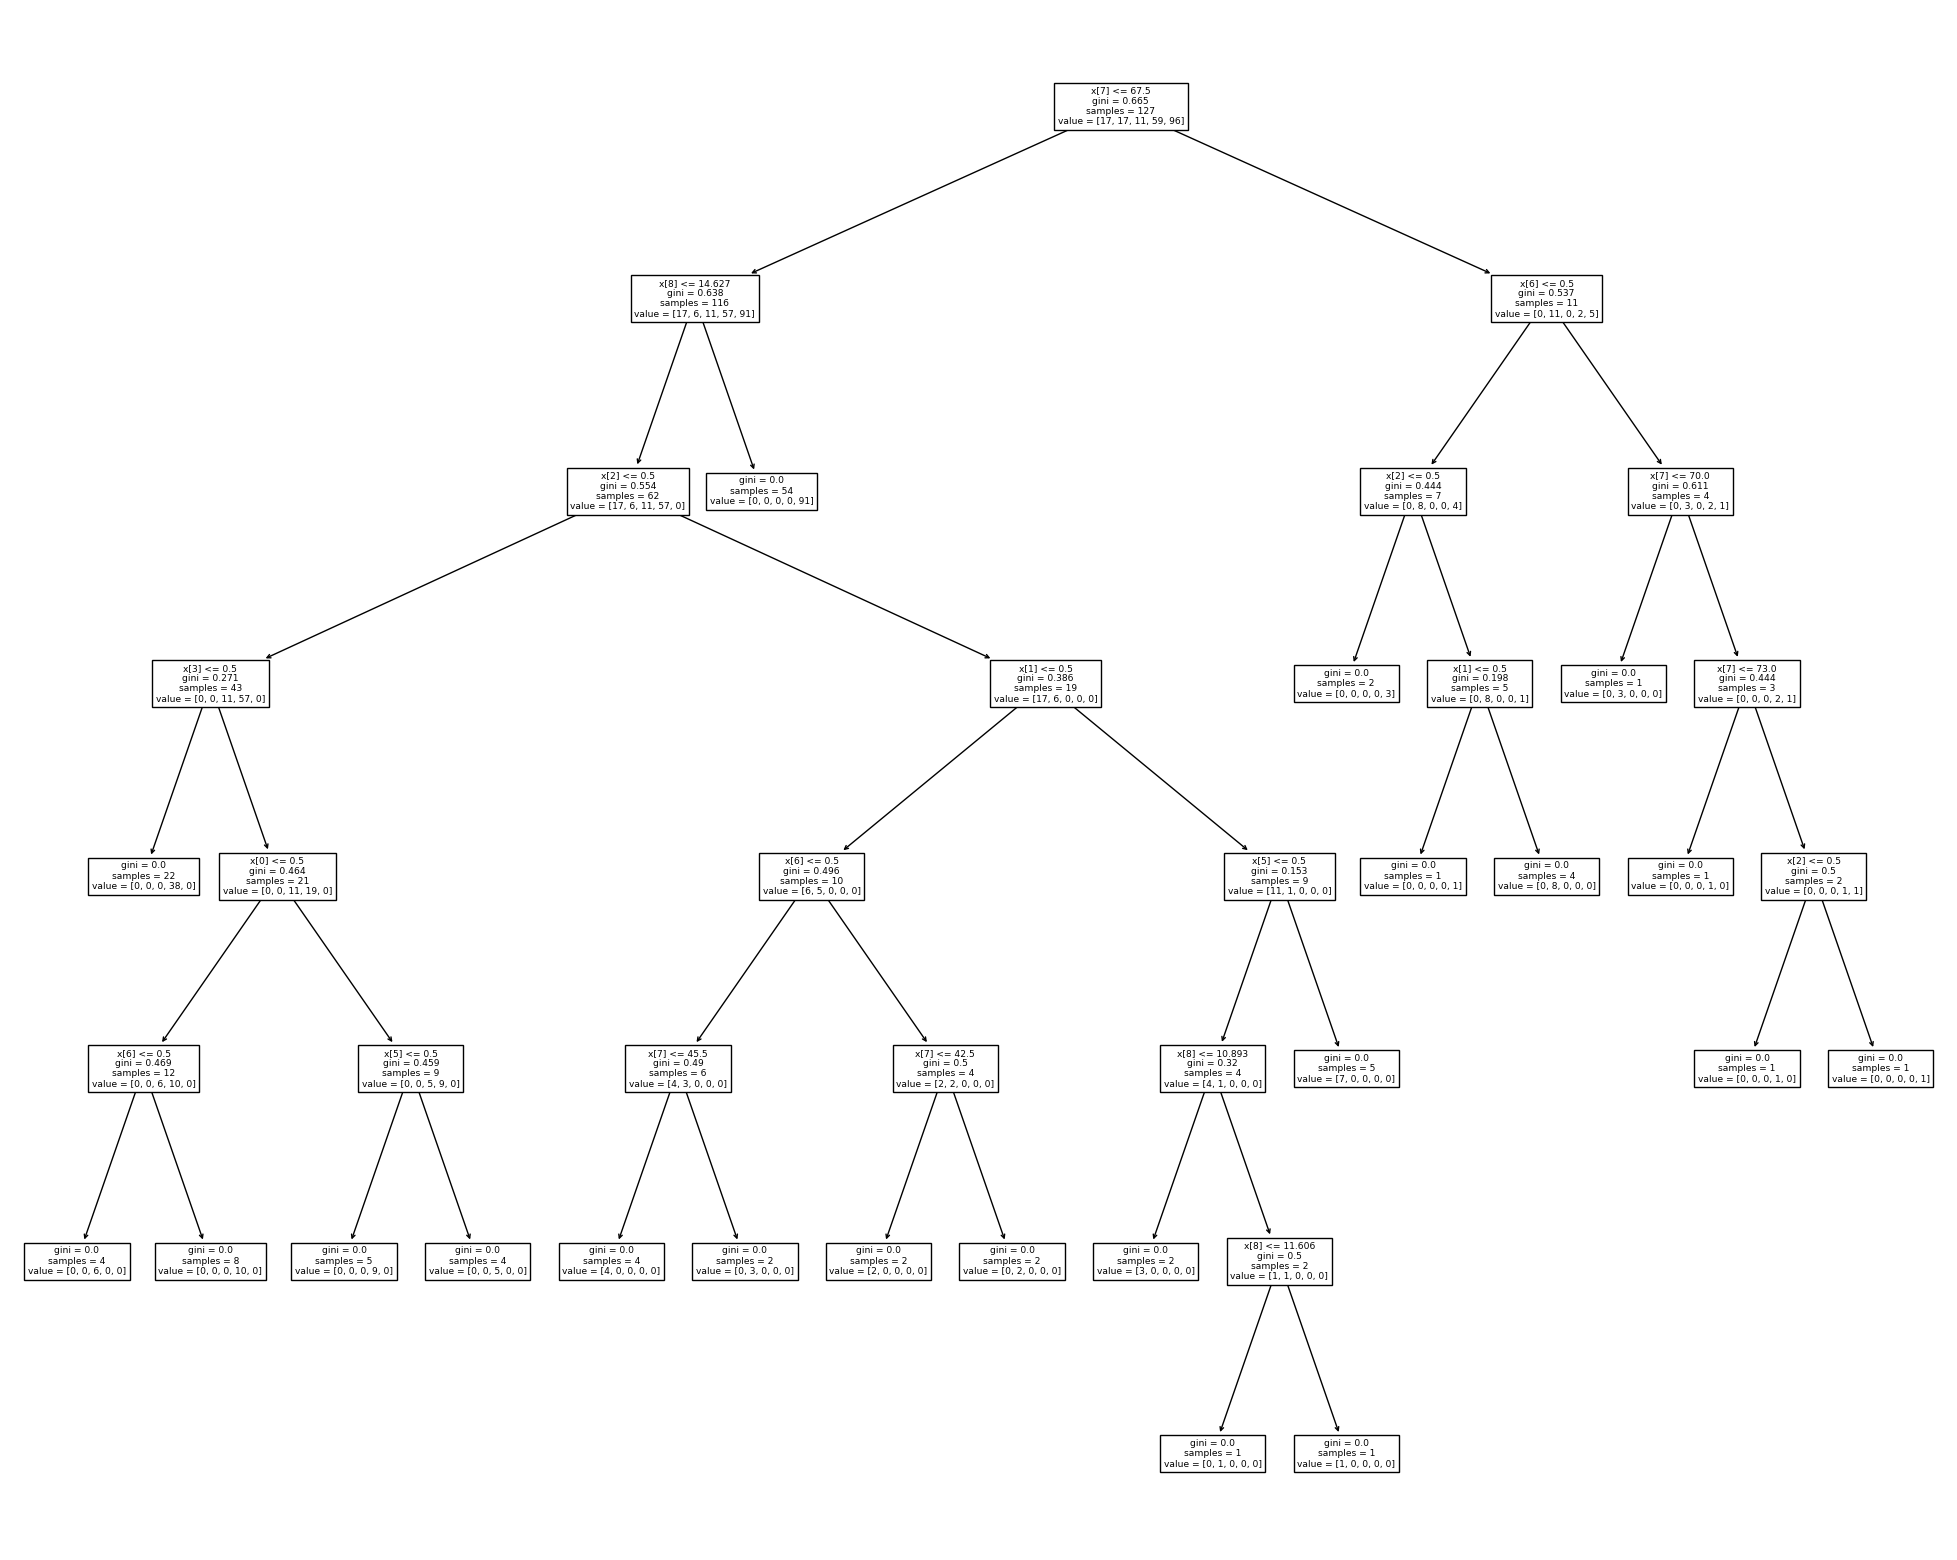

In [ ]:
estimator = regressor.estimators_[5]
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
tree.plot_tree(estimator)
plt.show()